In [16]:
import pandas as pd
import utils
utils.configs.setup_logging()

In [17]:
seed = 42
raw = utils.datasets.make_electricity_data("2017-01-01", "2024-01-01", random_state=seed)
raw

2024-10-10 10:01:10,931 - INFO - Setting numpy seed to: 42
2024-10-10 10:01:11,036 - INFO - Shape: (245376, 6) | Start: 2017-01-01 00:00:00 | End: 2023-12-31 23:45:00
2024-10-10 10:01:11,037 - INFO - Columns: ['electricity', 'wind_speed', 'wind_speed_no_seasonality', 'daily_seasonality', 'weekly_seasonality', 'yearly_seasonality']


,electricity,wind_speed,wind_speed_no_seasonality,daily_seasonality,weekly_seasonality,yearly_seasonality
time,,,,,,
2017-01-01 00:00:00,4.646257,7.324957,8.993428,0.000000,-0.781831,1.721336e-02
2017-01-01 00:15:00,4.879713,6.078854,7.723471,0.000000,-0.781831,1.721336e-02
2017-01-01 00:30:00,7.393996,8.368042,9.295377,0.000000,-0.781831,1.721336e-02
2017-01-01 00:45:00,9.797188,9.077267,11.046060,0.000000,-0.781831,1.721336e-02
2017-01-01 01:00:00,5.661695,6.979346,7.531693,0.258819,-0.781831,1.721336e-02
...,...,...,...,...,...,...
2023-12-31 22:45:00,2.861733,5.879903,8.459969,-0.500000,-0.781831,6.432491e-16
2023-12-31 23:00:00,0.742881,4.221408,7.124491,-0.258819,-0.781831,6.432491e-16
2023-12-31 23:15:00,3.551553,5.832298,8.008082,-0.258819,-0.781831,6.432491e-16


In [18]:
columns = ["electricity"]
raw = raw.loc[:, columns]
data = utils.transformations.minute_to_daily(raw)

2024-10-10 10:01:14,214 - INFO - Frequency change: 15min ->  1d
2024-10-10 10:01:14,215 - INFO - Shape change: (245376, 1) -> (2556, 96)


In [19]:
train_end_date = "2022-01-01"
validation_end_date = "2023-01-01"
train, validation, test = utils.splits.to_train_validation_test_data(
    data, train_end_date, validation_end_date
)

2024-10-10 10:01:14,236 - INFO - # of training observations: 1826 | 71.44%
2024-10-10 10:01:14,237 - INFO - # of validation observations: 365 | 14.28%
2024-10-10 10:01:14,237 - INFO - # of test observations: 365 | 14.28%


In [20]:
train

,electricity_00_00,electricity_00_15,electricity_00_30,electricity_00_45,electricity_01_00,electricity_01_15,electricity_01_30,electricity_01_45,electricity_02_00,electricity_02_15,...,electricity_21_30,electricity_21_45,electricity_22_00,electricity_22_15,electricity_22_30,electricity_22_45,electricity_23_00,electricity_23_15,electricity_23_30,electricity_23_45
date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,4.646257,4.879713,7.393996,9.797188,5.661695,4.037848,12.609469,5.464989,2.962939,8.350799,...,1.801508,1.395564,2.279858,4.069159,2.645239,7.167129,1.397186,1.576301,1.410751,0.872395
2017-01-02,7.786854,9.018141,5.150926,5.483033,1.621154,7.977245,5.568966,6.265438,7.284662,11.598908,...,5.394213,5.663738,2.179615,6.723930,4.726464,4.225983,2.848140,1.688935,4.018589,8.655840
2017-01-03,12.149066,5.395807,10.124262,14.675392,9.246344,9.906741,10.289398,6.870058,11.768053,15.297213,...,5.304337,6.218301,4.973110,11.997489,12.779788,5.505368,17.160815,3.265218,7.018067,9.665332
2017-01-04,13.337215,6.291884,8.856382,6.075163,9.272559,15.490847,14.859669,9.414175,17.156069,15.505181,...,12.779137,6.407667,13.964055,8.235884,19.326690,6.458680,5.268601,6.749114,3.112177,7.256896
2017-01-05,6.062267,6.735884,10.166620,14.211645,14.137351,8.639799,6.722356,10.369212,5.580464,19.830250,...,3.870819,0.910683,3.650085,11.203299,10.335758,3.136741,9.096449,7.705466,20.498487,10.048478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,14.097562,6.980438,9.375861,9.924443,9.295267,7.105954,9.435992,15.089429,0.876384,12.901979,...,5.699057,6.531708,6.638297,0.738673,5.035084,3.616631,6.163400,6.943446,18.870868,4.367954
2021-12-28,11.767576,8.425347,7.335708,9.627934,9.398645,13.479210,9.732129,2.955562,10.406489,12.648780,...,4.207406,2.414021,9.125357,7.717301,4.778882,12.063935,14.181461,6.410414,8.924756,14.452975
2021-12-29,10.756726,15.736545,11.992306,3.955933,6.209202,7.576466,7.395364,22.177986,17.385309,6.835041,...,2.383301,5.376147,8.973486,3.504587,6.921814,5.753482,7.689306,8.961504,5.970796,11.489137


<Axes: >

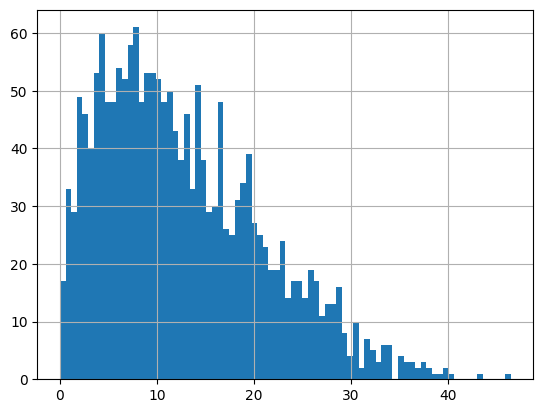

In [33]:
train.iloc[:, 17].hist(bins=80)